In [2]:
from cgi import print_form
from os import error

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm


# exam set June 2024

### poisson distribution

In [ ]:
#task 1
lambda1 = 10 #every hour
lambda2 = 15 #every hour

lambda1New = lambda1/4
lambda2New = lambda2/6

print(stats.poisson.pmf(10, lambda1New))
print(lambda1New/lambda2New)

In [ ]:
lambda2New = lambda2/30
print(1-stats.poisson.cdf(2, lambda2New))

### linear regression and conf interval on the model

In [ ]:
#task 3
n = 40 # normally distributed
airMean = 34.66
airStd = 10.12


In [ ]:

# Data
batch_sizes = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

# data to be predicted
costs = np.array([2.33, 4.21, 6.01, 7.51, 8.46, 8.93, 9.45, 10.70, 10.55, 10.74])

# Fit linear regression model
X = sm.add_constant(batch_sizes)  # Add intercept
model = sm.OLS(costs, X).fit()

# Extract R-squared
# r_squared = model.rsquared   -- if required or simply get it through summary

print(model.summary(slim=True))



In [ ]:
# this gives a confidence interval for all the variables in the model in the order of the model seen above 
# so the first confidence interval is for beta_0 or const
# and the second is for beta_1 or x1 
conf_interval_99 = model.conf_int(alpha=0.01)
print(conf_interval_99) 

In [ ]:
#V.1
print(24998/46551)

In [ ]:
# V.3 (12)
#expected count given that the distribution for both male and female is the same across all age groups 
# the formula is (row total * column total) / grand total
print((28176*24998)/46551)

In [ ]:
# V.4 (13)
alpha = 0.05
n=28176
proportion = 14048/n
standardError = np.sqrt((proportion*(1-proportion))/n)
zStat = stats.norm.ppf(1-alpha/2)

errorMargin = standardError * zStat
print(errorMargin) 
upMarg = proportion + errorMargin
lowMarg = proportion - errorMargin
print(f"conf int is low {lowMarg} and up {upMarg}")
 

### binomial distribution

In [ ]:
#v.5 (14)
# remember it is 100 or more so we need to find  area of 99 or less not 100 or less
print(1-stats.binom.cdf(99, 190, 0.45))

### conf interval without quick function

In [ ]:
#v.III (18)
n1, n2 = 25000, 15000 # normally distributed
mean1, mean2 = 1250, 1300
std1, std2 = 54.24, 28.54 
alpha = 0.05

meanDiff = mean1-mean2

SE = np.sqrt((std1**2 / n1) + (std2**2 / n2))


# stError = np.sqrt((proportion*(1-proportion)/n)   # this is for a proportion
critValue = stats.norm.ppf((1-alpha/2)) #  
# critValue = stats.norm.ppf((1-alpha/2),fDegrees) # for a big sample 29<n
marginError = critValue * SE

upBound = meanDiff+marginError
lowBound = meanDiff-marginError

print(f"Mean Difference: {meanDiff}")
print(f"Standard Error of the Difference: {SE:.4f}")
print(f"Critical Z-Value: {critValue:.4f}")
print(f"Margin of Error: {marginError:.4f}")
print(f"95% Confidence Interval: ({lowBound:.2f}, {upBound:.2f})")


### two sample t-test and hypothesis test where h0 is not 0 (and if it is)

In [ ]:
#VIII.2 (19)
nullDiff = -50

print((meanDiff-nullDiff)/SE)

In [ ]:
#VIII.3 (20)
# use when mean of two groups are dependant 
# if the hypothesis is not simply that the mean difference is 0 
# in the example the hypothesis is h_0 : mean_current - mean_new = 0.05
currentModel = np.array([7.964, 7.813, 8.299, 8.219, 9.832, 9.829, 9.842, 9.498, 7.023, 8.408])
newModel = np.array([7.932, 7.762 , 8.243, 8.174, 9.782, 9.775, 9.794, 9.445, 6.942, 8.347])
null_difference = 0.05
differences = currentModel - newModel
n = len(differences)
meanDiff = np.mean(differences)
stDeviation = np.std(differences, ddof=1)
standardErrorDiff = stDeviation/np.sqrt(n)

tStat = (meanDiff - null_difference) / standardErrorDiff

# Step 4: Compute the p-value
pValueDiff = 2 * (1 - stats.t.cdf(abs(tStat), df=n-1))
print(f"tStat {tStat} pVal {pValueDiff} meandiff {meanDiff} standardErr {standardErrorDiff}")

# OBS!!!! t-statistic and p-value directly if the hypthesis is h_0 : mean_current - mean_new = 0
#t_stat, p_value = stats.ttest_rel(currentModel, newModel)
#print(t_stat, p_value)

### two way anova

In [15]:
#IX.2 (22)

pValSupply = stats.f.sf(3.8696, 3,12)
pValDay = stats.f.sf(4.6362, 4, 12)
print(pValSupply, pValDay)


## the two way anova table itself (not nescessary for the task)

# Step 1: Create the data
data = pd.DataFrame({
    "Strength": [92.0, 131.0, 74.1, 90.4,  # Day 1
                 111.6, 103.5, 52.8, 95.2,  # Day 2
                 98.4, 100.0, 82.5, 87.6,  # Day 3
                 87.7, 84.7, 94.7, 63.2,  # Day 4
                 134.9, 134.5, 107.3, 119.5],  # Day 5
    "Supplier": ["A", "B", "C", "D"] * 5,
    "Day": ["Day 1"] * 4 + ["Day 2"] * 4 + ["Day 3"] * 4 + ["Day 4"] * 4 + ["Day 5"] * 4
})

# Step 2: Fit the two-way ANOVA model
model = smf.ols("Strength ~ C(Supplier) + C(Day)", data=data).fit()

# Step 3: Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)  # typ=2 for main effects only

# Display the ANOVA table
print(anova_table)

0.03793398766186806 0.01707042592892298
               sum_sq    df         F    PR(>F)
C(Supplier)  2508.756   3.0  3.869560  0.037935
C(Day)       4007.692   4.0  4.636164  0.017071
Residual     2593.324  12.0       NaN       NaN


In [ ]:
#X.1 & .2
#in both of these the task states that there i no distributional assumption which invalidates the t-test portion of both as a t-test assumes a normal distribution and the solution is therefore to see whether the null hypothesis is true based on the given 2.5% and 97.5% quantiles. if the values (in the first task a return of 20) (second task a difference of 0) are within the bounds of their respective values of said quantiles then the null hypothesis is "accepted" (or at least not rejected)

# 2023 may
### conf int for mean and proportion

In [ ]:
nice= stats.norm.ppf(0.85)
print(55+nice*19)

In [ ]:
data = 8500, 10300, 6800, 10600, 4900, 6200, 10800, 5700, 5100, 9000
n= len(data)
std = np.std(data)
mean = np.mean(data)
fDegrees = n-1
alpha = 0.01

stError = std/np.sqrt(n) # 1.6 this is for a mean
# stError = np.sqrt((proportion*(1-proportion)/n)   # this is for a proportion
critValue = stats.t.ppf((1-alpha/2),fDegrees) #  for a small smaple 30>n
# critValue = stats.norm.ppf((1-alpha/2),fDegrees) # for a big sample 29<n
marginError = critValue * stError

upBound = mean+marginError
lowBound = mean-marginError

print(f"The confidence interval is {lowBound} to {upBound}")



### 99% confidence interval

In [10]:
# VI.1
from scipy.stats import ttest_1samp

data = np.array([8500, 10300, 6800, 10600, 4900, 6200, 10800, 5700, 5100, 9000])
sample_mean = 17  # Example: mean duration
sample_std = 4.5    # Example: standard deviation
sample_size = 40   # Example: sample size
confidence_level = 0.99

# Calculate Z-score for 99% confidence
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Compute margin of error
margin_of_error = z_score * (sample_std / np.sqrt(sample_size))

# Calculate confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

#THIS SOLVED IT!!!!
popmean=10000
print(ttest_1samp(data, popmean=popmean).confidence_interval(0.99))

t_stat, p_value = ttest_1samp(data,popmean=popmean)

print(np.std(data))

print(f"CI: [{lower_bound:.2f};{upper_bound:.2f}]")

ConfidenceInterval(low=np.float64(5399.6826889705535), high=np.float64(10180.317311029447))
2206.558406206371
0.81
CI: [15.17;18.83]


### linear regression

In [17]:
#VIII.1 (12)+(13)+(14)
#(12)
#beta1 slope koefficient (is under year -- estiamte) and times it by 5 years  0.027634*5
print(0.027634*5)
#asnwer in 3rd option

#(13)
# tObs = beta 1 (0.027634) / stdErr (0.008736)
tObs = 0.027634/0.008736
#critical value is found by 
df = 24 #found in the regression output
alpha = 0.01
critVal = stats.t.ppf(1-alpha/2, df)
print(f"crit val:{critVal} tObs:{tObs}")
# option 2 is correct since the citIntVal is +-2.8 and tObs is > 2.8

#(14)
alpha2 = 0.05
critVal2 = stats.t.ppf(1-alpha2/2, df)
print(f"crit val:{critVal2}")

0.13817
crit val:2.796939504772804 tObs:3.1632326007326004
crit val:2.063898561628021


### prediction interval

In [18]:
#(15)
# Data: Year (independent variable) and DO (dependent variable)
year = np.array(range(1990, 2016))
DO = np.array([1.52, 2.88, 1.60, 2.24, 2.45, 1.84, 2.03, 2.33, 2.81,
               2.46, 2.36, 2.23, 2.81, 2.70, 2.63, 2.00, 2.40, 2.45,
               2.48, 2.51, 2.55, 2.77, 2.70, 2.23, 2.88, 3.09])

# Create a DataFrame
data = pd.DataFrame({'year': year, 'DO': DO})

# Fit the linear regression model
model = smf.ols('DO ~ year', data=data).fit()

# Define the year for prediction (2022 in this case)
new_year = pd.DataFrame({'year': [2022]})

# Get predictions with confidence and prediction intervals
predictions = model.get_prediction(new_year)

# Get summary frame (includes prediction interval)
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% confidence level

print(pred_summary)

#below mean ci is the confidence interval and obs ci is the prediction interval 
# answer is 1 as the value is within the prediction interval

       mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  2.960021  0.18252       2.583317       3.336724      2.174297      3.745744


### exponential distribution find the chance of event in x time

In [19]:
#IX.1(16)
# Parameters
lambda_val = 1/2 # rate at which events occur pr unit of time fx 1 for an event every 1 hour 1/2 for an event every two hours...
rate_param = 1 / lambda_val # inverse of lambda val and defines how much time for 1 event ao here 15 units of time before an event
k = 1 # find cumulative probability of 

# Calculate Exponential CDF for P(X < k)
expo_cdf1 = stats.expon.cdf(1, scale=rate_param)
expo_cdf2 = 1-stats.expon.cdf(2, scale=rate_param)
expo_cdf = 1-(expo_cdf1+expo_cdf2)
print(f"P(X < {k}) = {expo_cdf}")

# Calculate mean and variance
mean, var = stats.expon.stats(scale=rate_param)
#print(f"Mean: {mean}")
#print(f"Variance: {var}")
#answer is number 5

P(X < 1) = 0.2386512185411911
Mean: 2.0
Variance: 4.0


### simulation

In [ ]:
#X.1 (17)
import numpy as np

# Given heights data
heights = np.array([162, 172, 178, 154, 173, 174, 166, 166, 164, 167, 163, 165, 170, 177])

# Parameters
n_simulations = 1000
np.random.seed(1234)  # Ensure reproducibility

# Step 1: Estimate mean and standard deviation from the data
mean_height = np.mean(heights)
std_height = np.std(heights, ddof=1)

# Step 2: Generate bootstrap samples from normal distribution
bootstrap_samples = np.random.normal(loc=mean_height, scale=std_height, size=(n_simulations, len(heights)))

# Step 3: Compute the median for each bootstrap sample
bootstrap_medians = np.median(bootstrap_samples, axis=1)

# Step 4: Calculate the 95% confidence interval for the median
ci_lower, ci_upper = np.percentile(bootstrap_medians, [2.5, 97.5])

# Display the result
print(f"95% Confidence Interval for the Median: [{ci_lower:.2f}, {ci_upper:.2f}]")

### two way anova and bonferroni

In [20]:
#XI.1 (20)
# freedom degree is number of categories -1 so 4 paint categories = 3 fd
# two methods = 1 fd
# residuals fd = paintfd (3) * methodfd (1) = 3 fd
# aswer is 4 because two method observations pr paint type so 2*4 = 8

#XI.2 (21)
# Total significance level (alpha)
alpha = 0.05

# Number of categories (k) for pairwise comparisons
k = 4

# Calculate the number of pairwise comparisons (m)
m = k * (k - 1) // 2  # Combination formula for k choose 2

# Calculate Bonferroni-corrected alpha
alpha_bonferroni = alpha / m

print(f"Number of comparisons (m): {m}")
print(f"Bonferroni-corrected alpha: {alpha_bonferroni:.5f}")
#the asnwer lies in the calculation of alpha_bonferroni so if we insert numbers in the formula we get
# so the answer is alpha/m = 0.05/6 so option 4

Number of comparisons (m): 6
Bonferroni-corrected alpha: 0.00833


### varianse and hypotesis test and choice of test method

In [22]:
#XII.1 (23)
# Data from the problem
consumption = np.array([5.4, 4.5, 4.6, 4.4, 4.9, 3.3, 4.1, 4.6, 4.8, 4.6,
                        5.2, 4.7, 4.4, 4.8, 4.8, 5.2, 4.9, 4.8, 5.6, 5.5])

# Calculate the total variation (SST)
overall_mean = np.mean(consumption)
sst = np.sum((consumption - overall_mean) ** 2)

print(f"Total Variation (SST): {sst}")

#XII.2 (24)

# we use a one-way anova because we are comparing means across multiple groups (months)
# to see how to choose between one way or two way see anove in random notes

# Data
consumption = np.array([5.4, 4.5, 4.6, 4.4, 4.9, 3.3, 4.1, 4.6, 4.8, 4.6,
                        5.2, 4.7, 4.4, 4.8, 4.8, 5.2, 4.9, 4.8, 5.6, 5.5])
month = ['Feb'] * 5 + ['May'] * 5 + ['Aug'] * 5 + ['Nov'] * 5

# Create a DataFrame
data = pd.DataFrame({'Consumption': consumption, 'Month': month})

# Perform one-way ANOVA
anova_model = smf.ols('Consumption ~ C(Month)', data=data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Output the ANOVA table
print(anova_table)

# as we see in the one-way anova the p-value is less than the significance level so we therefore reject the null hypothesis og 0.05 
# 0.05 > 0.0303
# the answer is option 5 as that is the one which states that we use one-way anova and reject the hypothesis as the p-value is 0.03 < 0.05

Total Variation (SST): 5.069500000000002
          sum_sq    df         F    PR(>F)
C(Month)  2.1215   3.0  3.838082  0.030293
Residual  2.9480  16.0       NaN       NaN


### poisson problem and variance of poisson 

In [26]:
#XIII.1 (24)
# in a poisson distribution the variance is always equal to the mean so 
# variance = mean = 48
# answer 2 is correct

#XIII.2 (25)
# Parameters
# when we have 48 calls an hour to find how many calls we expect in 5 min we say 
min5 = 60/5 # = 12
print(min5)
lambda_val = 48/min5  # mean (expected number of events) = 4
print(lambda_val)
k = 1           # lower limit of events for the "greater than" probability because we want to find the probability of 1 or lower

# Calculate Poisson CDF for P(X > k)
poisson_prob_greater = 1 - stats.poisson.cdf(k, lambda_val)

print(f"P(X > {k}) = {poisson_prob_greater}")

12.0
4
P(X > 1) = 0.9084218055563291


### confidence interval with z-score

In [31]:
#XIV.1 (26)
# Given data
p_hat = 24 / 100  # Proportion of "Meget svært"
n = 100  # Total number of responses
z = 1.96  # Z-value for 95% confidence level

# Standard error calculation
se = np.sqrt((p_hat * (1 - p_hat)) / n)
print(se)
# Confidence interval calculation
lower_bound = p_hat - z * se
upper_bound = p_hat + z * se

print(f"95% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

print(0.24 + 1.96*np.sqrt(0.1824/100))
print(0.24 - 1.96*np.sqrt(0.1824/100))

# asnwer number 2 (this one is retarded because you have to manually calculate the asnwers)

#XIV.2 (27)
# literally the same retard problem

# Given data
p_hat = 5 / 101  # Proportion of "Meget svært"
n = 101  # Total number of responses
z = 1.96  # Z-value for 95% confidence level

# Standard error calculation
se = np.sqrt((p_hat * (1 - p_hat)) / n)

# Confidence interval calculation
lower_bound = p_hat - z * se
upper_bound = p_hat + z * se

print(f"95% Confidence Interval: ({lower_bound:.6f}, {upper_bound:.6f})")

print(0.0666667 + 1.96*np.sqrt(0.0622/105))
print(0.0666667 - 1.96*np.sqrt(0.0622/105))

0.04270831300812525
95% Confidence Interval: (0.1563, 0.3237)
0.32370829349592545
0.1562917065040745
95% Confidence Interval: (0.007200, 0.091810)
0.11437089967536052
0.018962500324639475


### chi-square test of independence

In [ ]:
    #XIV.3 (28)
# Data from the table for 2021
ledig = np.array([11, 15, 27, 24, 24])  # Responses for "ledig"
beskaeftiget = np.array([20, 30, 29, 12, 5])  # Responses for "beskæftiget"

# Perform a Chi-square test
chi2, p_value, _, _ = stats.chi2_contingency([ledig, beskaeftiget])

# Print results
print(f"Chi-squared value: {chi2}") # small value indicates close to expected data and vice versa 
print(f"p-value: {p_value:.12f}") # :.xf signifies number of digits

# Decision at 5% significance level
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference (reject H0).")
else:
    print("There is no significant difference (fail to reject H0).")
    
    

In [39]:
# XIV.4 (29)
# Given data
total_nemt = 82  # Total responses for "Nemt"
total_2019 = 101  # Total responses for 2019
total_responses = 503  # Total responses for all years

# Calculate expected value
expected_value = (total_nemt * total_2019) / total_responses
print(expected_value)

16.46520874751491


### p-value for the Chi-Square test using the given chi-squared statistic and degrees of freedom

In [40]:
#XIV.5 (30)
# Given data
chi2_stat = 4.5303
df = 16

# Calculate p-value for the Chi-Square test
p_value = 1 - stats.chi2.cdf(chi2_stat, df)

print(f"The p-value is: {p_value}")
# correct asnwer is number 3

The p-value is: 0.9976389316224069


# 2023 june 

### One-Way ANOVA

In [41]:
# (1)
# Data for the three groups
group1 = [27, 22, 18, 26, 24]
group2 = [32, 22, 32, 25, 25]
group3 = [29, 25, 30, 30, 24]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(group1, group2, group3)
print(f"Problem 1 - ANOVA F-Statistic: {f_stat:.4f}, P-value: {p_value:.4f}")
# answer is number 2

Problem 1 - ANOVA F-Statistic: 1.9282, P-value: 0.1879


### Calculating Residual Degrees of Freedom and Mean Square Error (ANOVA)

In [46]:
#(2)
# Problem Setup
n = 15  # Total number of observations
k = 3   # Number of groups
ss_residuals = 440.80  # Sum of squares of residuals

# Degrees of Freedom for Residuals
df_residuals = n - k  # Correct calculation
print(f"Degrees of Freedom (Residuals): {df_residuals}")

# Mean Square Residuals
ms_residuals = ss_residuals / df_residuals  # Correct calculation
print(f"Mean Square Residuals: {ms_residuals:.3f}")

# Validate Correct Option
if df_residuals == 12 and np.isclose(ms_residuals, 36.733, atol=0.001):
    print("Correct option: 3")
else:
    print("Recheck calculations or data.")

Degrees of Freedom (Residuals): 12
Mean Square Residuals: 36.733
Correct option: 3


### Mean and Variance of a Linear Combination of Random Variables

In [47]:
#(3)
# Let b1, b2 be coefficients and µ be the mean
b1, b2, a1 = 2, 3, 5  # Example coefficients
mu = 10  # Mean of X
var_x = 4  # Variance of X (since X ~ N(µ, 2^2))

# Calculate mean and variance of Y1
mean_y1 = a1 + (b1 + b2) * mu
variance_y1 = (b1 + b2)**2 * var_x

print(f"Problem 3 - E(Y1): {mean_y1}, V(Y1): {variance_y1}")
# as seen in the method of calculation the answer is 1

Problem 3 - E(Y1): 55, V(Y1): 100


### Sigmoid Function Variance (Logistic Function)

In [48]:
#(4)
# Logistic function for Y2
a2, b2 = 10, -1  # Given coefficients
x = np.array([0, 10, 20])  # Example means

# Calculate logistic function for each value of x
y2 = 1 / (1 + np.exp(a2 + b2 * x))
var_y2 = y2 * (1 - y2)  # Variance of Bernoulli variable

print(f"Problem 4 - Variance at µ=0: {var_y2[0]:.4f}, µ=10: {var_y2[1]:.4f}, µ=20: {var_y2[2]:.4f}")
# answer is 4 

Problem 4 - Variance at µ=0: 0.0000, µ=10: 0.2500, µ=20: 0.0000


### Paired T-Test (Testing Mean Difference Between Two Exam Scores)

In [49]:
#(5)
# Example data for student exam scores
# use what test to use function
exam_part1 = [78, 82, 74, 90, 68]
exam_part2 = [80, 85, 72, 88, 70]

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(exam_part1, exam_part2)
print(f"Problem 5 - Paired T-Test Statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# answer is 5 

Problem 5 - Paired T-Test Statistic: -0.5571, P-value: 0.6072


### Confidence Interval for the Difference in Means (Unequal Variances) (fdegrees with welch)

In [50]:
#(6)
# Given data for the two universities
mean_A, mean_B = 736.4, 769.9
var_A, var_B = 169.1, 402.7
n_A, n_B = 589, 240

# Calculate standard error
se = np.sqrt(var_A / n_A + var_B / n_B)

# Calculate degrees of freedom (Welch-Satterthwaite)
df = ((var_A / n_A + var_B / n_B)**2) / ((var_A / n_A)**2 / (n_A - 1) + (var_B / n_B)**2 / (n_B - 1))

# Calculate t-critical for 90% CI
t_critical = stats.t.ppf(0.95, df)

print(f"Problem 6 - Degrees of Freedom: {df:.4f}, T-Critical: {t_critical:.4f}")
# we use the 95% quantile because we account for 5% on either tail when finding 90% confidence interval
# so with freedom degrees 323.93 and 95% quantile answer is 5 

Problem 6 - Degrees of Freedom: 323.9297, T-Critical: 1.6496


### Confidence Interval for Proportion

In [51]:
#(7)
# Given survival data
survived = 709
total = 2201
p_hat = survived / total

# Calculate standard error for proportion
se = np.sqrt(p_hat * (1 - p_hat) / total)

# Calculate z-critical value for 95% CI
z_critical = stats.norm.ppf(0.975)

# Calculate margin of error and confidence interval
margin_of_error = z_critical * se
ci_lower = p_hat - margin_of_error
ci_upper = p_hat + margin_of_error

print(f"Problem 7 - 95% CI for proportion: ({ci_lower:.4f}, {ci_upper:.4f})")
# answer is 2

Problem 7 - 95% CI for proportion: (0.3026, 0.3416)


### Test of Independence (Chi-Square Test on Titanic Data)

In [58]:
# (8)
from statsmodels.stats.proportion import proportions_ztest

# Data
s = np.array([178, 212])  # Success counts for crew and 3rd class passengers
n = np.array([706, 885])  # Total counts for crew and 3rd class passengers

# Perform the two-sample z-test for proportions
z_stat, p_value = proportions_ztest(s, n)

# Print the results
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Z-statistic: 0.5794
P-value: 0.5623


### Chi-Square Test for Independence

In [62]:
#(9)
from scipy.stats import chi2

# Observed survival counts across classes
observed = np.array([
    [202, 117, 178, 212],  # Survived
    [123, 168, 528, 673]   # Not Survived
])

# Step 1: Compute the total and expected counts
row_totals = observed.sum(axis=1)
col_totals = observed.sum(axis=0)
grand_total = observed.sum()

# Calculate expected frequencies
expected = np.outer(row_totals, col_totals) / grand_total

# Step 2: Compute the chi-square statistic
q_stat = ((observed - expected) ** 2 / expected).sum()

# Step 3: Determine the degrees of freedom
df = (observed.shape[0] - 1) * (observed.shape[1] - 1)

# Step 4: Find the critical value at α = 0.05
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, df)

# Step 5: Determine significance
significant = q_stat > critical_value

# Output the results
print(f"Test Statistic (q): {q_stat:.2f}")
print(f"Critical Value (CV): {critical_value:.2f}")
print(f"Is there a significant difference? {'Yes' if significant else 'No'}")

Test Statistic (q): 187.11
Critical Value (CV): 7.81
Is there a significant difference? Yes


### Confidence Interval for a Proportion

In [65]:
#(10)
# Given data
p_1st = 0.62  # Survival probability of 1st class passengers
p_rest = 0.27  # Average survival probability of other passengers
n_1st = 325  # Number of 1st class passengers
n_rest = 571  # Number of other passengers

# Difference in proportions
p_diff = p_1st - p_rest

# Standard error calculation
se_diff = np.sqrt((p_1st * (1 - p_1st) / n_1st) + (p_rest * (1 - p_rest) / n_rest))

# Confidence interval (95%)
z_critical = stats.norm.ppf(1 - 0.05 / 2)  # Two-tailed test
ci_lower = p_diff - z_critical * se_diff
ci_upper = p_diff + z_critical * se_diff

# Display the confidence interval
print(f"Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")

# Conclusion
if 0.2 > ci_lower and 0.2 < ci_upper:
    print("0.2 is included in the confidence interval. There is no significant difference.")
else:
    print("0.2 is not included in the confidence interval. There is a significant difference.")

Confidence Interval: [0.29, 0.41]
0.2 is not included in the confidence interval. There is a significant difference.


### std of sum of independant random variables

In [66]:
#(11)
# Statistical Concept: Standard deviation of the sum of independent random variables
# Purpose: Calculate the standard deviation of the total trash collected by the class.
# Given data
n_children = 20  # Number of children
std_per_child = 0.2  # Standard deviation of trash collected per child (in kg)

# Standard deviation of the total collected trash
std_total = std_per_child * np.sqrt(n_children)

# Display the result
print(f"The standard deviation of the total trash collected: {std_total:.2f} kg")

The standard deviation of the total trash collected: 0.89 kg


### The hypergeometric distribution

In [67]:
#(12)
# Statistical Concept: Hypergeometric distribution
# Purpose: Calculate the probability of selecting exactly 3 plastic items out of 5 random selections.

from scipy.stats import hypergeom

# Given data
total_items = 21  # Total number of items
plastic_items = 6  # Number of plastic items
sample_size = 5  # Number of items picked
successes = 3  # Desired number of plastic items

# Calculate the probability
probability = hypergeom.pmf(successes, total_items, plastic_items, sample_size)

# Display the result
print(f"The probability of selecting exactly 3 plastic items: {probability:.3f}")

The probability of selecting exactly 3 plastic items: 0.103


### The binomial distribution

In [68]:
#(13)
# Statistical Concept: Binomial distribution
# Purpose: Calculate the probability of selecting exactly 3 plastic items out of 18 based on a 32% plastic probability.

from scipy.stats import binom

# Given data
n = 18  # Total number of items collected
p = 0.32  # Probability of an item being plastic
k = 3  # Desired number of plastic items

# Calculate the probability
probability = binom.pmf(k, n, p)

# Display the result
print(f"The probability of selecting exactly 3 plastic items: {probability:.3f}")

The probability of selecting exactly 3 plastic items: 0.082


### chi-squared distribution is used to calculate confidence intervals for the variance or standard deviation

In [69]:
#(14)
# Statistical Concept: Chi-squared distribution
# Purpose: Calculate the 95% confidence interval for the standard deviation.

from scipy.stats import chi2

# Given data
n = 26  # Sample size
s = 0.75  # Observed standard deviation
alpha = 0.05  # Significance level

# Degrees of freedom
df = n - 1

# Calculate the chi-squared critical values
chi2_lower = chi2.ppf(alpha / 2, df)
chi2_upper = chi2.ppf(1 - alpha / 2, df)

# Calculate the confidence interval for the variance
lower_variance = (df * s**2) / chi2_upper
upper_variance = (df * s**2) / chi2_lower

# Convert to standard deviation
lower_sd = np.sqrt(lower_variance)
upper_sd = np.sqrt(upper_variance)

# Display the confidence interval
print(f"The 95% confidence interval for the standard deviation is: [{lower_sd:.3f}, {upper_sd:.3f}]")

The 95% confidence interval for the standard deviation is: [0.588, 1.035]


### t-test for a single sample mean

In [72]:
#(15)
# Problem parameters
sample_mean = 200.3  # Observed sample mean
pop_mean = 200       # Hypothesized population mean
std_dev = 0.75       # Observed sample standard deviation
n = 26               # Sample size
df = n - 1           # Degrees of freedom

# Calculate the t-statistic
t_stat = (sample_mean - pop_mean) / (std_dev / (n ** 0.5))

# Critical t-values for significance levels
critical_t_5 = stats.t.ppf(1 - 0.05 / 2, df)  # Two-tailed 5%
critical_t_10 = stats.t.ppf(1 - 0.10 / 2, df)  # Two-tailed 10%

# Print t-statistic and critical values
print(f"T-statistic: {t_stat:.3f}")
print(f"Critical t-value at 5% (two-tailed): ±{critical_t_5:.3f}")
print(f"Critical t-value at 10% (two-tailed): ±{critical_t_10:.3f}")

# Conclusion based on t-statistic
if abs(t_stat) > critical_t_10:
    conclusion = "Rejected at 10%"
else:
    conclusion = "Accepted at 10%"

if abs(t_stat) > critical_t_5:
    conclusion_5 = "Rejected at 5%"
else:
    conclusion_5 = "Accepted at 5%"

print(f"Conclusion at 5%: {conclusion_5}")
print(f"Conclusion at 10%: {conclusion}")

# Correct answer based on the solution
correct_answer = "Option 5: Rejected at 10%"
print(f"Correct Answer: {correct_answer}")

T-statistic: 2.040
Critical t-value at 5% (two-tailed): ±2.060
Critical t-value at 10% (two-tailed): ±1.708
Conclusion at 5%: Accepted at 5%
Conclusion at 10%: Rejected at 10%
Correct Answer: Option 5: Rejected at 10%


### Sample Size Calculation for Hypothesis Testing

In [73]:
#(16)
# Parameters for the problem
mu_difference = 0.3  # Difference to detect
sigma = 0.75  # Standard deviation
alpha = 0.05  # Type I error (significance level)
beta = 0.05  # Type II error (1 - power)
z_alpha = stats.norm.ppf(1 - alpha / 2)  # Critical z-value for two-sided test
z_beta = stats.norm.ppf(1 - beta)  # Critical z-value for power

# Calculate the minimum sample size
n_normal = ((z_alpha + z_beta) * sigma / mu_difference) ** 2
n_normal_rounded = np.ceil(n_normal)  # Rounded up sample size to nearest integer

# Result
print(f"Minimum sample size needed: {n_normal_rounded}")
# the normal approximation is +2

Minimum sample size needed: 82.0


### Linear Regression Degrees of Freedom

In [74]:
#(17)
# Statistical Concept: Linear Regression Degrees of Freedom

# Degrees of freedom for residuals (given in the problem)
df_residual = 165

# Number of predictors (x1 and x2) + intercept
n_predictors = 2  # x1 and x2 (intercept is implicitly included)

# Total number of observations
n_observations = df_residual + n_predictors + 1

# Output the result
print(f"Total number of observations: {n_observations}")

Total number of observations: 168


### Multiple Linear Regression

In [75]:
import pandas as pd
#(18)
# Given t-statistics and standard errors
coef_table = {
    "Coefficients": ["Intercept", "x1", "x2"],
    "Estimate": [6.43959, 0.40303, 0.20019],
    "Std_Error": [0.01468, 0.02076, 0.02076],
}

# Convert to DataFrame
df = pd.DataFrame(coef_table)

# Calculate t-values
df["t_value"] = df["Estimate"] / df["Std_Error"]

# Calculate p-values (two-tailed test)
from scipy.stats import t
degrees_of_freedom = 165  # Residual degrees of freedom
df["p_value"] = 2 * (1 - t.cdf(abs(df["t_value"]), df=degrees_of_freedom))

# Extract p-values
pv1, pv2, pv3 = df["p_value"]

# Determine the order
order = sorted([("pv1", pv1), ("pv2", pv2), ("pv3", pv3)], key=lambda x: x[1])

# Print results
print("Order of p-values (from smallest to largest):")
for label, value in order:
    print(f"{label}: {value:.6f}")

# Answer: Based on the order
if order == [("pv2", pv2), ("pv3", pv3), ("pv1", pv1)]:
    print("Answer: Option 1 (pv2 < pv3 < pv1)")
elif order == [("pv1", pv1), ("pv2", pv2), ("pv3", pv3)]:
    print("Answer: Option 2 (pv1 < pv2 < pv3)")
elif order == [("pv1", pv1), ("pv3", pv3), ("pv2", pv2)]:
    print("Answer: Option 3 (pv1 < pv3 < pv2)")
elif order == [("pv3", pv3), ("pv1", pv1), ("pv2", pv2)]:
    print("Answer: Option 4 (pv3 < pv1 < pv2)")
elif order == [("pv1", pv1), ("pv2", pv2), ("pv3", pv3)] and pv2 == pv3:
    print("Answer: Option 5 (pv1 < pv2 = pv3)")

Order of p-values (from smallest to largest):
pv1: 0.000000
pv2: 0.000000
pv3: 0.000000
Answer: Option 2 (pv1 < pv2 < pv3)


### Residual Diagnostics

In [77]:
#(19)
# Observations and corresponding statements
statements = {
    1: "Based on figure A we should consider log-transforming the outcome",
    2: "The residuals seem to be independent (figure C)",
    3: "The normality assumption is clearly violated (figure A)",
    4: "The residuals seem to be normally distributed (figure B)",
    5: "There are still systematic effects related to time of day (figure D)",
}

# Correct answers based on observations
correct_answer = [5]

# Display the correct answer
print("Correct Answer(s):")
for i in correct_answer:
    print(f"{i}: {statements[i]}")

Correct Answer(s):
5: There are still systematic effects related to time of day (figure D)


### standard error estimation for the mean when no predictors are included in the model.

In [78]:
#(20)
# Given values
variance = 0.137  # Variance of the outcome variable
n = 166  # Number of observations

# Calculate the standard error
standard_error = np.sqrt(variance / n)

# Print the result
print(f"The standard error related to the estimate of β0 is: {standard_error:.5f}")

# Determine the closest answer from the options
answers = [0.0147, 0.00990, 0.00734, 0.0208, 0.0106]
closest_answer = min(answers, key=lambda x: abs(x - standard_error))
print(f"The closest answer is: {closest_answer}")

The standard error related to the estimate of β0 is: 0.02873
The closest answer is: 0.0208


### linear regression to determine the 99% confidence interval

In [79]:
#(21)
# Given data
wind = np.array([1063, 1450, 879, 1980, 406, 1542, 1212, 1157, 1730, 1105, 775, 856, 802, 851])
elpris = np.array([26.84, 24.87, 21.65, 13.26, 24.49, 21.90, 23.29, 22.47, 19.26, 27.86, 27.96, 20.85, 21.83, 34.04])

# Linear regression
X = sm.add_constant(wind)  # Add intercept
model = sm.OLS(elpris, X).fit()

# Extract slope (beta1) and standard error
beta1 = model.params[1]
se_beta1 = model.bse[1]

# Degrees of freedom
df = len(wind) - 2

# 99% confidence interval
t_critical = stats.t.ppf(0.995, df)  # Two-tailed t-value for 99% confidence
ci_lower = beta1 - t_critical * se_beta1
ci_upper = beta1 + t_critical * se_beta1

# Output
print(f"99% Confidence Interval for β1: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Closest match
answers = [
    [-0.0148, 0.0017],
    [-0.0124, -0.0007],
    [-0.0066, 0.0027],
    [21.16, 40.87],
]
closest_answer = min(answers, key=lambda x: abs(ci_lower - x[0]) + abs(ci_upper - x[1]))
print(f"The closest answer is: {closest_answer}")

99% Confidence Interval for β1: [-0.0148, 0.0017]
The closest answer is: [-0.0148, 0.0017]


### linear regression to compute the prediction interval for a given input

In [80]:
#(22)
# Given data
wind = np.array([1063, 1450, 879, 1980, 406, 1542, 1212, 1157, 1730, 1105, 775, 856, 802, 851])
elpris = np.array([26.84, 24.87, 21.65, 13.26, 24.49, 21.90, 23.29, 22.47, 19.26, 27.86, 27.96, 20.85, 21.83, 34.04])

# Linear regression
X = sm.add_constant(wind)  # Add intercept
model = sm.OLS(elpris, X).fit()

# Prediction at wind = 1000
new_wind = np.array([1, 1000])  # Include constant term
prediction = model.get_prediction(new_wind)

# Extract 95% prediction interval
pi_lower, pi_upper = prediction.summary_frame(alpha=0.05).iloc[0][['obs_ci_lower', 'obs_ci_upper']]

# Output
print(f"95% Prediction Interval: [{pi_lower:.2f}, {pi_upper:.2f}]")

# Closest match
answers = [
    [0.70, 12.41],
    [11.41, 37.50],
    [15.15, 33.76],
    [21.95, 26.97],
    [23.98, 38.05],
]
closest_answer = min(answers, key=lambda x: abs(pi_lower - x[0]) + abs(pi_upper - x[1]))
print(f"The closest answer is: {closest_answer}")

95% Prediction Interval: [15.15, 33.76]
The closest answer is: [15.15, 33.76]


### two-way ANOVA understanding the model
(23)
The model equation is:
$$
Y_{ij} = \mu + \alpha_i + \beta_j + \epsilon_{ij}
$$
Where:
	•	 \mu : Overall mean of the response variable (plant growth).
	•	 \alpha_i : Effect of the i-th level of the first factor (fertilizer type).
	•	 \beta_j : Effect of the j-th level of the second factor (watering frequency).
	•	 \epsilon_{ij} : Error term assumed to follow N(0, \sigma^2).

The question asks about the interpretation of  \alpha_i .

Correct Answer:

Option 3:
 \alpha_i  denotes the effect size for fertilizer.  \alpha_i \neq 0  implies that the expected plant growth depends on fertilizer type.

Reasoning:
	•	 \alpha_i  represents the deviation of the i-th fertilizer’s effect from the overall mean.
	•	It is unrelated to watering frequency ( \beta_j ).
	•	 \alpha_i = 0  indicates no effect of fertilizer type on plant growth.

### two-way ANOVA and the F-test for testing the equality of means among different groups

In [81]:
#(24)
# Given F-value from the ANOVA table
F_obs = 78.766  # Observed F-statistic for Fertilizer
df1 = 1         # Degrees of freedom for Fertilizer
df2 = 2         # Degrees of freedom for Residuals
alpha = 0.05    # Significance level

# Calculate critical F-value
F_crit = stats.f.ppf(1 - alpha, df1, df2)

# Determine the result of the hypothesis test
if F_obs > F_crit:
    result = "Reject the null hypothesis. Significant difference exists among fertilizers."
else:
    result = "Fail to reject the null hypothesis. No significant difference exists among fertilizers."

# Output
print(f"Critical F-value (F_crit): {F_crit:.2f}")
print(f"Observed F-value (F_obs): {F_obs:.2f}")
print(f"Conclusion: {result}")

Critical F-value (F_crit): 18.51
Observed F-value (F_obs): 78.77
Conclusion: Reject the null hypothesis. Significant difference exists among fertilizers.


### boxplot to understand distributions and proportions of data

The incorrect statement is:
60% of the students in the sample had a positive difference in scores.


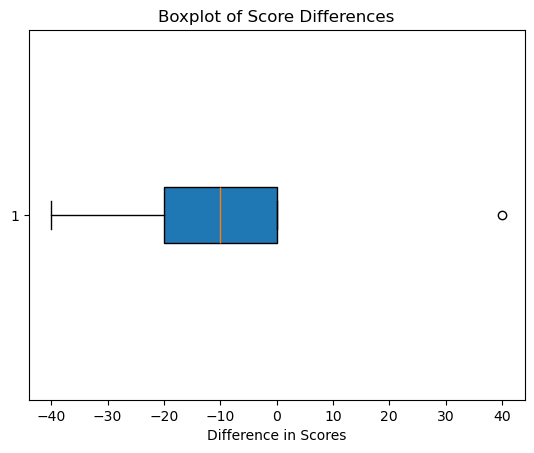

In [83]:
#(26)
# Description of the boxplot data (assumed values based on the image and question)
# Boxplot interpretation:
q1 = -20  # First quartile
median = -10  # Median
q3 = 0  # Third quartile
min_value = -40  # Minimum value
max_value = 40  # Maximum value

# Statements from the question:
statements = [
    "More than half of the students in the sample had a negative difference in scores.",
    "More than 20% of the students in the sample had a positive difference in scores.",
    "At least one student in the sample had a difference higher than 40 points in scores.",
    "60% of the students in the sample had a positive difference in scores.",
    "No student in the sample had a difference in scores higher than 50 points."
]

# Analyze the statements:
# 1. True: More than half had a negative difference since the median is -10.
# 2. True: The third quartile is 0, meaning at least 25% had positive differences.
# 3. True: The maximum value of 40 suggests someone could have exactly 40.
# 4. False: Only 25% (not 60%) of the students had a positive difference.
# 5. True: The maximum value is 40, so no score is above 50.

# Incorrect statement:
incorrect_statement = statements[3]

# Output
print("The incorrect statement is:")
print(incorrect_statement)

# (Optional) Visualize the boxplot based on the assumed data
data = [min_value, q1, median, q3, max_value]
plt.boxplot(data, vert=False, patch_artist=True)
plt.title("Boxplot of Score Differences")
plt.xlabel("Difference in Scores")
plt.show()

### bootstrap confidence intervals to assess the significance of the null hypothesis (H_0: \mu = 0) based on resampling.

In [84]:
#(27)
# Simulated bootstrap results from the R code provided
bootstrap_means = np.array([-6.54, -1.21])  # 90% CI
bootstrap_means_95 = np.array([-7.05, -0.77])  # 95% CI
bootstrap_means_99 = np.array([-8.09, 0.23])  # 99% CI

# Analyzing significance levels:
# 1. Alpha = 0.10 (90% CI): Does the interval contain 0?
alpha_10_contains_zero = 0 >= bootstrap_means[0] and 0 <= bootstrap_means[1]

# 2. Alpha = 0.025 (95% CI): Does the interval contain 0?
alpha_025_contains_zero = 0 >= bootstrap_means_95[0] and 0 <= bootstrap_means_95[1]

# 3. Alpha = 0.005 (99% CI): Does the interval contain 0?
alpha_005_contains_zero = 0 >= bootstrap_means_99[0] and 0 <= bootstrap_means_99[1]

# Determine the correct statement:
if not alpha_10_contains_zero:
    result = "Significant at alpha = 0.1"
elif not alpha_025_contains_zero:
    result = "Significant at alpha = 0.025"
elif not alpha_005_contains_zero:
    result = "Significant at alpha = 0.01"
else:
    result = "No significant difference detected."

print("Conclusion based on the confidence intervals:")
print(result)
#option 1 i correct

Conclusion based on the confidence intervals:
Significant at alpha = 0.1


### bootstrap confidence intervals to evaluate whether the difference in means between two groups is statistically significant.

In [86]:
#(28)
# Corrected Python code to ensure the proper logic aligns with Option 4.

import numpy as np

# Simulated confidence intervals from R output
ci_xlow = [-9.23, -2.94]  # CI for low scoring group
ci_xhigh = [-3.11, 1.92]  # CI for high scoring group
ci_diff = [1.41, 9.56]  # CI for difference in means

# Determine if zero is included in the confidence intervals
xlow_contains_zero = 0 >= ci_xlow[0] and 0 <= ci_xlow[1]
xhigh_contains_zero = 0 >= ci_xhigh[0] and 0 <= ci_xhigh[1]
diff_contains_zero = 0 >= ci_diff[0] and 0 <= ci_diff[1]

# Analyze the significance
if not diff_contains_zero:
    result = "A significant difference between the two groups is detected since the confidence interval for the difference in mean doesn’t include zero."
else:
    result = "No significant difference between the two groups is detected because the confidence interval for the difference includes zero."

# Print the corrected conclusion
print("Conclusion (Corrected):")
print(result)

# Correct Answer Based on Analysis
correct_answer = 4
print(f"The correct answer is Option {correct_answer}.")

Conclusion (Corrected):
A significant difference between the two groups is detected since the confidence interval for the difference in mean doesn’t include zero.
The correct answer is Option 4.


### Poisson distribution

In [87]:
#(29)
import numpy as np
from scipy.stats import poisson

# Given data
lambda_ = 4  # average number of raisins
k = 0        # no raisins

# Calculate the probability
probability = poisson.pmf(k, lambda_)
print(f"The probability that Karl's portion contains no raisins is: {probability:.3f}")

# Correct answer (closest option)
if abs(probability - 0.018) < 1e-3:
    correct_option = 2
elif abs(probability - 0.001) < 1e-3:
    correct_option = 1
elif abs(probability - 0.183) < 1e-3:
    correct_option = 3
elif abs(probability - 0.250) < 1e-3:
    correct_option = 4
elif abs(probability - 0.368) < 1e-3:
    correct_option = 5

print(f"The correct answer is Option {correct_option}.")

The probability that Karl's portion contains no raisins is: 0.018
The correct answer is Option 2.


### Poisson distribution

In [88]:
#(30)
# Given data
lambda_karoline = 8  # Average number of raisins for Karoline
k = 4                # Upper limit for P(X <= 4)

# Calculate P(X <= 4) and complement
p_less_than_5 = poisson.cdf(k, lambda_karoline)
p_greater_or_equal_5 = 1 - p_less_than_5

print(f"The probability that Karoline's portion contains five or more raisins is: {p_greater_or_equal_5:.3f}")

# Correct answer (closest option)
if abs(p_greater_or_equal_5 - 0.092) < 1e-3:
    correct_option = 1
elif abs(p_greater_or_equal_5 - 0.099) < 1e-3:
    correct_option = 2
elif abs(p_greater_or_equal_5 - 0.191) < 1e-3:
    correct_option = 3
elif abs(p_greater_or_equal_5 - 0.809) < 1e-3:
    correct_option = 4
elif abs(p_greater_or_equal_5 - 0.900) < 1e-3:
    correct_option = 5

print(f"The correct answer is Option {correct_option}.")

The probability that Karoline's portion contains five or more raisins is: 0.900
The correct answer is Option 5.


# 2024 may

### confidence interval and hypothesis test 

In [90]:
# Problem parameters
sample_mean = 17  # Observed sample mean
pop_mean = 18       # Hypothesized population mean
std_dev = 4.5       # Observed sample standard deviation
n = 48               # Sample size
df = n - 1           # Degrees of freedom

# Calculate the t-statistic
t_stat = (sample_mean - pop_mean) / (std_dev / (n ** 0.5))

# Critical t-values for significance levels
critical_t_5 = stats.t.ppf(1 - 0.05 / 2, df)  # Two-tailed 5%
critical_t_10 = stats.t.ppf(1 - 0.10 / 2, df)  # Two-tailed 10%

# Print t-statistic and critical values
print(f"T-statistic: {t_stat:.3f}")
print(f"Critical t-value at 5% (two-tailed): ±{critical_t_5:.3f}")
print(f"Critical t-value at 10% (two-tailed): ±{critical_t_10:.3f}")

# Conclusion based on t-statistic
if abs(t_stat) > critical_t_10:
    conclusion = "Rejected at 10%"
else:
    conclusion = "Accepted at 10%"

if abs(t_stat) > critical_t_5:
    conclusion_5 = "Rejected at 5%"
else:
    conclusion_5 = "Accepted at 5%"

print(f"Conclusion at 5%: {conclusion_5}")
print(f"Conclusion at 10%: {conclusion}")

# Correct answer based on the solution
correct_answer = "Option 5: Rejected at 10%"
print(f"Correct Answer: {correct_answer}")

T-statistic: -1.491
Critical t-value at 5% (two-tailed): ±2.015
Critical t-value at 10% (two-tailed): ±1.680
Conclusion at 5%: Accepted at 5%
Conclusion at 10%: Accepted at 10%
Correct Answer: Option 5: Rejected at 10%


### p-value 

In [96]:
print(2 * stats.t.sf(np.abs(-1.74), 45))


0.08869482522995444


### confidence interval for std

In [97]:
sample_std = 0.09   # Sample standard deviation
sample_size = 30     # Sample size
confidence_level = 0.95     # Confidence level

df = sample_size - 1

# Alpha
alpha = 1 - confidence_level

# Chi-square critical values
chi2_lower = stats.chi2.ppf(alpha / 2, df)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df)

# Confidence interval bounds
lower_bound = np.sqrt((df * sample_std**2) / chi2_upper)
upper_bound = np.sqrt((df * sample_std**2) / chi2_lower)

print("[" , lower_bound , ";" ,  upper_bound , "]")

[ 0.07167662394863718 ; 0.12098836613164021 ]


### probability P(X<3) for 5 given points of probability mass function

In [98]:
print(0.17+0.22+0.28)

0.67


### Calculating the Variance of a Discrete Random Variable

In [101]:

# Values of X and their probabilities
x_values = np.array([0, 1, 2, 3, 4])
probabilities = np.array([0.17, 0.22, 0.28, 0, 0.33])
mean = 2.10  # Provided mean of X

# Variance calculation
variance = np.sum(probabilities * (x_values - mean)**2)

print(f"The variance of X is: {variance:.2f}")

The variance of X is: 2.21


### effect of a group in one-way anova when given avarage mean and mean for group

In [102]:
# Data
overall_mean = 252.5  # Overall mean
location1_mean = 250.0  # Average concentration for Location 1

# Calculate the effect of Location 1
effect_location1 = location1_mean - overall_mean

# Print the result
print("The effect of Location 1 is:", effect_location1)

F-Statistic: 1.8860
P-Value: 0.2070
No significant difference between group means.


### standard error deviation of one-way anova 

In [103]:
# total sum of squares SST (915.92) 
# location sum of squares SS(location) (480.00)
# Given values
SSE = 915.92 - 480.00  # Calculate SSE
n = 16  # Total number of observations
k = 4   # Number of groups

# Degrees of freedom for error
df_error = n - k

# Estimate of the error standard deviation
sigma_hat = np.sqrt(SSE / df_error)

print("The estimate of the error standard deviation (σ̂) is:", round(sigma_hat, 3))

The estimate of the error standard deviation (σ̂) is: 6.027


In [104]:
x = np.array([0, 0, 2, 2, 4, 4, 6, 6, 8, 8, 12, 12])
y = np.array([16, 116, 1170, 841, 2287, 2012, 2653, 3333, 4270, 3999, 5750, 5407])
fit = smf.ols('y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(fit.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
No. Observations:                  12   F-statistic:                     608.4
Covariance Type:            nonrobust   Prob (F-statistic):           2.74e-10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    160.7286    125.745      1.278      0.230    -119.449     440.906
x            467.5821     18.957     24.666      0.000     425.344     509.821

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


/opt/homebrew/Caskroom/miniconda/base/envs/statistics_exam_prep/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)
